<a href="https://colab.research.google.com/github/Ge0f3/tensorflow_certification/blob/main/TF_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

print(tf.__version__)

2.8.2


## Creating data to view and fit

We could start by importing a classification dataset but let's practice making some of our own classification data.

> 🔑 **Note:** It's a common practice to get you and model you build working on a toy (or simple) dataset before moving to your actual problem. Treat it as a rehersal experiment before the actual experiment(s).

Since classification is predicting whether something is one thing or another, let's make some data to reflect that.

To do so, we'll use Scikit-Learn's [`make_circles()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html#sklearn.datasets.make_circles) function.



In [ ]:
from sklearn.datasets import make_circles


n_samples = 1000

X,Y = make_circles(n_samples,noise=0.03,random_state=42)

In [ ]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
Y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [ ]:
# Make a dataframe of feature and labels 

import pandas as pd 


circles = pd.DataFrame ({'x0':X[:,0],'X1':X[:,1],"label":Y})

In [ ]:
circles.head()

,x0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [ ]:
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

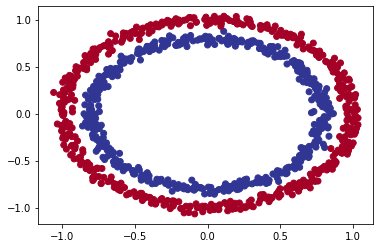

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.RdYlBu)

# Modeling

## Steps in modelling

Now we know what data we have as well as the input and output shapes, let's see how we'd build a neural network to model it.

In TensorFlow, there are typically 3 fundamental steps to creating and training a model.

1. **Creating a model** - piece together the layers of a neural network yourself (using the [functional](https://www.tensorflow.org/guide/keras/functional) or [sequential API](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential)) or import a previously built model (known as transfer learning).
2. **Compiling a model** - defining how a model's performance should be measured (loss/metrics) as well as defining how it should improve (optimizer). 
3. **Fitting a model** - letting the model try to find patterns in the data (how does `X` get to `y`). 

Let's see these in action using the Sequential API to build a model for our regression data. And then we'll step through each.

In [ ]:
tf.random.set_seed(42)


# create the model using the squential API 

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#compile the model 

model_1.compile(loss=tf.keras.losses.BinaryFocalCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics=['accuracy']
                )

model_1.fit(X,Y,epochs=5)

Epoch 1/5
32/32 [==============================] - 6s 5ms/step - loss: 0.7437 - accuracy: 0.4750
Epoch 2/5
32/32 [==============================] - 0s 4ms/step - loss: 0.1855 - accuracy: 0.4960
Epoch 3/5
32/32 [==============================] - 0s 4ms/step - loss: 0.1763 - accuracy: 0.4940
Epoch 4/5
32/32 [==============================] - 0s 5ms/step - loss: 0.1740 - accuracy: 0.4920
Epoch 5/5
32/32 [==============================] - 0s 5ms/step - loss: 0.1736 - accuracy: 0.5070


In [ ]:
model_1.evaluate(X, Y)

32/32 [==============================] - 0s 3ms/step - loss: 0.1734 - accuracy: 0.5160


[0.17338690161705017, 0.515999972820282]

In [ ]:
tf.random.set_seed(42)


# create the model using the squential API 

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

#compile the model 

model_2.compile(loss=tf.keras.losses.BinaryFocalCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics=['accuracy']
                )

model_2.fit(X,Y,epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 3ms/step - loss: 0.5492 - accuracy: 0.5150
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 0.1800 - accuracy: 0.5030
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 0.1787 - accuracy: 0.4960
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 0.1773 - accuracy: 0.4990
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 0.1764 - accuracy: 0.5020


In [ ]:
model_2.evaluate(X, Y)

32/32 [==============================] - 0s 3ms/step - loss: 0.1759 - accuracy: 0.5000


[0.1759108155965805, 0.5]

## Improving a model

To improve our model, we can alter almost every part of the 3 steps we went through before.

1. **Creating a model** - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.
2. **Compiling a model** - you might want to choose a different optimization function (such as the [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) optimizer, which is usually pretty good for many problems) or perhaps change the learning rate of the optimization function.
3. **Fitting a model** - perhaps you could fit a model for more epochs (leave it training for longer).

![various options you can use to improve a neural network model](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/02-improving-a-model-from-model-perspective.png)
*There are many different ways to potentially improve a neural network. Some of the most common include: increasing the number of layers (making the network deeper), increasing the number of hidden units (making the network wider) and changing the learning rate. Because these values are all human-changeable, they're referred to as [hyperparameters](https://en.wikipedia.org/wiki/Hyperparameter_(machine_learning)) and the practice of trying to find the best hyperparameters is referred to as [hyperparameter tuning](https://en.wikipedia.org/wiki/Hyperparameter_optimization).*

How about we try adding more neurons, an extra layer and our friend the Adam optimizer?

Surely doing this will result in predictions better than guessing...

> **Note:** The following message (below this one) can be ignored if you're running TensorFlow 2.8.0+, the error seems to have been fixed.

> **Note:** If you're using TensorFlow 2.7.0+ (but not 2.8.0+) the original code from the following cells may have caused some errors. They've since been updated to fix those errors. You can see explanations on what happened at the following resources:
* [Example Colab Notebook](https://colab.research.google.com/drive/1_dlrB_DJOBS9c9foYJs49I0YwN7LTakl?usp=sharing)
* [TensorFlow for Deep Learning GitHub Discussion on TensorFlow 2.7.0 breaking changes](https://github.com/mrdbourke/tensorflow-deep-learning/discussions/278)


In [ ]:
# set random_seed 

tf.random.set_seed(42)

#Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#Compile the model
model_3.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)



In [ ]:
model_3.fit(X,Y, epochs=100,verbose=0)

In [ ]:
model_3.evaluate(X,Y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6980 - accuracy: 0.5090


[0.6980189681053162, 0.5090000033378601]

Still! 

We've pulled out a few tricks but our model isn't even doing better than guessing.

Let's make some visualizations to see what's happening.

> 🔑 **Note:** Whenever your model is performing strangely or there's something going on with your data you're not quite sure of, remember these three words: **visualize, visualize, visualize**. Inspect your data, inspect your model, inpsect your model's predictions.

To visualize our model's predictions we're going to create a function `plot_decision_boundary()` which:
* Takes in a trained model, features (`X`) and labels (`y`).
* Creates a [meshgrid](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) of the different `X` values.
* Makes predictions across the meshgrid.
* Plots the predictions as well as a line between the different zones (where each unique class falls).
* Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb

If this sounds confusing, let's see it in code and then see the output.

> 🔑 **Note:** If you're ever unsure of what a function does, try unraveling it and writing it line by line for yourself to see what it does. Break it into small parts and see what each part outputs.

In [ ]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class 
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

doing binary classifcation...


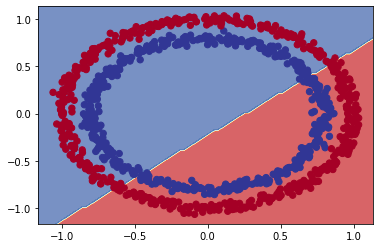

In [ ]:
plot_decision_boundary(model_3,X,Y)

Try the model with a regrssion problem 

In [ ]:
# Setup random seed
tf.random.set_seed(42)

# Recreate the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Change the loss and metrics of our compiled model
model_3.compile(loss=tf.keras.losses.mae, # change the loss function to be regression-specific
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae']) # change the metric to be regression-specific

# Fit the recompiled model
model_3.fit(tf.expand_dims(X, axis=-1), 
            Y, 
            epochs=100,verbose=0)

In [ ]:
# # Make predictions with our trained model
# y_reg_preds = model_3.predict(Y)

# # Plot the model's predictions against our regression data
# plt.figure(figsize=(10, 7))
# plt.scatter(X_reg_train, y_reg_train, c='b', label='Training data')
# plt.scatter(X_reg_test, y_reg_test, c='g', label='Testing data')
# plt.scatter(X_reg_test, y_reg_preds.squeeze(), c='r', label='Predictions')
# plt.legend();

## The missing piece: Non-linearity

Okay, so we saw our neural network can model straight lines (with ability a little bit better than guessing).

What about non-straight (non-linear) lines?

If we're going to model our classification data (the red and clue circles), we're going to need some non-linear lines.

> 🔨 **Practice:** Before we get to the next steps, I'd encourage you to play around with the [TensorFlow Playground](https://playground.tensorflow.org/#activation=linear&batchSize=1&dataset=circle&regDataset=reg-plane&learningRate=0.01&regularizationRate=0&noise=0&networkShape=1&seed=0.09561&showTestData=false&discretize=false&percTrainData=70&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&regularizationRate_hide=true&discretize_hide=true&regularization_hide=true&dataset_hide=true&noise_hide=true&batchSize_hide=true) (check out what the data has in common with our own classification data) for 10-minutes. In particular the tab which says "activation". Once you're done, come back.

Did you try out the activation options? If so, what did you find?

If you didn't, don't worry, let's see it in code.

We're going to replicate the neural network you can see at this link: [TensorFlow Playground](https://playground.tensorflow.org/#activation=linear&batchSize=1&dataset=circle&regDataset=reg-plane&learningRate=0.01&regularizationRate=0&noise=0&networkShape=1&seed=0.09561&showTestData=false&discretize=false&percTrainData=70&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&regularizationRate_hide=true&discretize_hide=true&regularization_hide=true&dataset_hide=true&noise_hide=true&batchSize_hide=true).

![simple neural net created with TensorFlow playground](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/02-tensorflow-playground-simple-net-linear-activation.png)
*The neural network we're going to recreate with TensorFlow code. See it live at [TensorFlow Playground](https://playground.tensorflow.org/#activation=linear&batchSize=1&dataset=circle&regDataset=reg-plane&learningRate=0.01&regularizationRate=0&noise=0&networkShape=1&seed=0.09561&showTestData=false&discretize=false&percTrainData=70&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&regularizationRate_hide=true&discretize_hide=true&regularization_hide=true&dataset_hide=true&noise_hide=true&batchSize_hide=true).*

The main change we'll add to models we've built before is the use of the `activation` keyword.


In [ ]:
tf.random.set_seed(42)

#create the model 

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1,activation = tf.keras.activations.sigmoid)
])

model_4.compile(
    loss = tf.keras.losses.binary_crossentropy,
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics = ['accuracy']
)

# Fit the model 

history = model_4.fit(X,Y, epochs=25,verbose=1)

Epoch 1/25
32/32 [==============================] - 2s 3ms/step - loss: 0.6908 - accuracy: 0.5010
Epoch 2/25
32/32 [==============================] - 0s 3ms/step - loss: 0.6609 - accuracy: 0.5750
Epoch 3/25
32/32 [==============================] - 0s 3ms/step - loss: 0.5893 - accuracy: 0.7320
Epoch 4/25
32/32 [==============================] - 0s 3ms/step - loss: 0.4298 - accuracy: 0.8970
Epoch 5/25
32/32 [==============================] - 0s 3ms/step - loss: 0.1750 - accuracy: 0.9930
Epoch 6/25
32/32 [==============================] - 0s 3ms/step - loss: 0.0705 - accuracy: 0.9950
Epoch 7/25
32/32 [==============================] - 0s 3ms/step - loss: 0.0503 - accuracy: 0.9920
Epoch 8/25
32/32 [==============================] - 0s 3ms/step - loss: 0.0234 - accuracy: 1.0000
Epoch 9/25
32/32 [==============================] - 0s 3ms/step - loss: 0.0193 - accuracy: 1.0000
Epoch 10/25
32/32 [==============================] - 0s 3ms/step - loss: 0.0162 - accuracy: 1.0000
Epoch 11/25
32/32 [

doing binary classifcation...


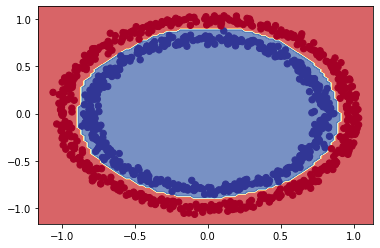

In [ ]:
# Check the deicison boundary (blue is blue class, yellow is the crossover, red is red class)
plot_decision_boundary(model_4, X, Y)

In [ ]:
model_4.evaluate(X,Y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 1.0000


[0.0020248163491487503, 1.0]

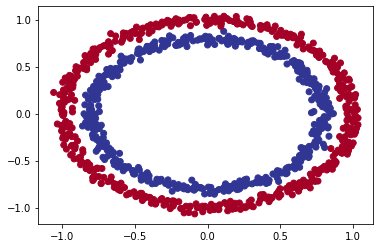

In [ ]:
# Check out our data
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.RdYlBu);

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, 4 neurons, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, 4 neurons, ReLU activation
  tf.keras.layers.Dense(1,activation= tf.keras.activations.sigmoid) # ouput layer
])

# Compile the model
model_6.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # Adam's default learning rate is 0.001
                metrics=['accuracy'])

# Fit the model
history = model_6.fit(X, Y, epochs=100,verbose=0)

doing binary classifcation...


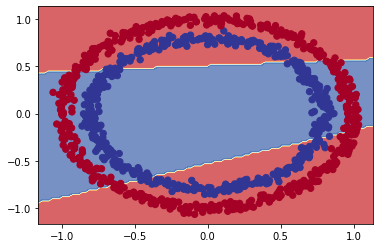

In [ ]:
# Check the deicison boundary (blue is blue class, yellow is the crossover, red is red class)
plot_decision_boundary(model_6, X, Y)

What gives? 

It seems like our model is the same as the one in the [TensorFlow Playground](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,4&seed=0.93799&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&regularization_hide=true&regularizationRate_hide=true&batchSize_hide=true) but model it's still drawing straight lines... 

Ideally, the yellow lines go on the inside of the red circle and the blue circle.

Okay, okay, let's model this circle once and for all. 

One more model (I promise... actually, I'm going to have to break that promise... we'll be building plenty more models). 

This time we'll change the activation function on our output layer too. Remember the architecture of a classification model? For binary classification, the output layer activation is usually the [Sigmoid activation function](https://www.tensorflow.org/api_docs/python/tf/math/sigmoid).

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, ReLU activation
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) # ouput layer, sigmoid activation
])

# Compile the model
model_7.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history = model_7.fit(X, Y, epochs=100, verbose=0)

In [ ]:
# Evaluate our model
model_7.evaluate(X, Y)

32/32 [==============================] - 0s 3ms/step - loss: 0.2948 - accuracy: 0.9910


[0.29480040073394775, 0.9909999966621399]

doing binary classifcation...


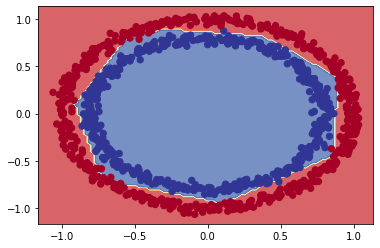

In [ ]:
plot_decision_boundary(model_7,X,Y)

Nice! It looks like our model is almost perfectly (apart from a few examples) separating the two circles.

> 🤔 **Question:** What's wrong with the predictions we've made? Are we really evaluating our model correctly here? Hint: what data did the model learn on and what did we predict on?

Before we answer that, it's important to recognize what we've just covered.

> 🔑 **Note:** The combination of **linear (straight lines) and non-linear (non-straight lines) functions** is one of the key fundamentals of neural networks.

Think of it like this:

If I gave you an unlimited amount of straight lines and non-straight lines, what kind of patterns could you draw?

That's essentially what neural networks do to find patterns in data.

Now you might be thinking, "but I haven't seen a linear function or a non-linear function before..."

Oh but you have.

We've been using them the whole time.

They're what power the layers in the models we just built.

To get some intuition about the activation functions we've just used, let's create them and then try them on some toy data.

In [ ]:
# Create a toy tensor (similar to the data we pass into our model)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

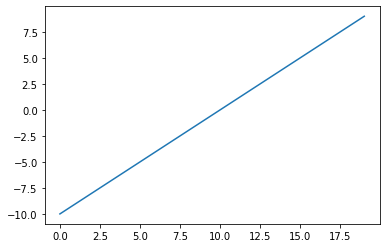

In [ ]:
plt.plot(A)

Activation Function - Sigmoid 

In [ ]:
def sigmoid(x):
  return 1/ (1+tf.exp(-x))

sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397868e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726230e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105854e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

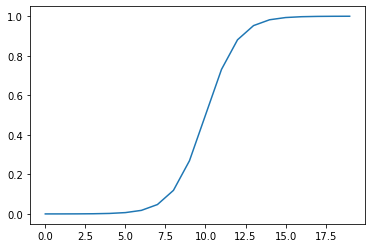

In [ ]:
plt.plot(sigmoid(A))

Activation Function - Relu 

In [ ]:
def relu(x):
  return tf.maximum(0,x)

relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

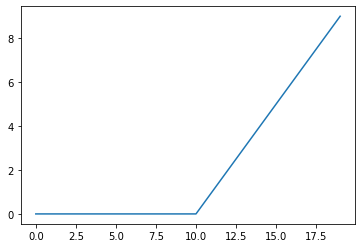

In [ ]:
plt.plot(relu(A))

In [ ]:
# Linear - https://www.tensorflow.org/api_docs/python/tf/keras/activations/linear (returns input non-modified...)
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

In [ ]:
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

## Evaluating and improving our classification model

If you answered the question above, you might've picked up what we've been doing wrong.

We've been evaluating our model on the same data it was trained on.

A better approach would be to split our data into training, validation (optional) and test sets.

Once we've done that, we'll train our model on the training set (let it find patterns in the data) and then see how well it learned the patterns by using it to predict values on the test set.

Let's do it.

In [ ]:
# Split data into train and test sets
X_train, y_train = X[:800], Y[:800] # 80% of the data for the training set
X_test, y_test = X[800:], Y[800:] # 20% of the data for the test set

# Check the shapes of the data
X_train.shape, X_test.shape # 800 examples in the training set, 200 examples in the test set 

((800, 2), (200, 2))

In [ ]:
# Model 8 

tf.random.set_seed(8)

# Create the model (same as of model 7)


model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu'),
     tf.keras.layers.Dense(4,activation='relu'),
      tf.keras.layers.Dense(1,activation='sigmoid'),

])

#Compile the model 

model_8.compile(loss= tf.keras.losses.binary_crossentropy,
               optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
               metrics= ['accuracy']
               )

#Fit the model 
history = model_8.fit(X_train,y_train,epochs=25)

Epoch 1/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6955 - accuracy: 0.4975
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6865 - accuracy: 0.5275
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6807 - accuracy: 0.5575
Epoch 4/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6735 - accuracy: 0.5650
Epoch 5/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6629 - accuracy: 0.5838
Epoch 6/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6494 - accuracy: 0.6212
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6206 - accuracy: 0.7325
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5849 - accuracy: 0.7275
Epoch 9/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5510 - accuracy: 0.7675
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5115 - accuracy: 0.8012
Epoch 11/25
25/25 [

In [ ]:
#Metrics

loss ,accuracy = model_8.evaluate(X_test,y_test)

print(f'model loss on the test set : {loss}')
print(f'model accuracy on the test set: {100*accuracy:.2f}%')

7/7 [==============================] - 0s 3ms/step - loss: 0.0783 - accuracy: 0.9900
model loss on the test set : 0.07830586284399033
model accuracy on the test set: 99.00%


100% accuracy? Nice!

Now, when we started to create `model_8` we said it was going to be the same as `model_7` but you might've found that to be a little lie.

That's because we changed a few things: 
* **The `activation` parameter** - We used strings (`"relu"` & `"sigmoid"`) instead of using library paths (`tf.keras.activations.relu`), in TensorFlow, they both offer the same functionality.
* **The `learning_rate` (also `lr`) parameter** - We increased the **learning rate** parameter in the [Adam optimizer](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) to `0.01` instead of `0.001` (an increase of 10x).
  * You can think of the learning rate as how quickly a model learns. The higher the learning rate, the faster the model's capacity to learn, however, there's such a thing as a *too high* learning rate, where a model tries to learn too fast and doesn't learn anything. We'll see a trick to find the ideal learning rate soon.
* **The number of epochs** - We lowered the number of epochs (using the `epochs` parameter) from 100 to 25 but our model still got an incredible result on both the training and test sets.
  * One of the reasons our model performed well in even less epochs (remember a single epoch is the model trying to learn patterns in the data by looking at it once, so 25 epochs means the model gets 25 chances) than before is because we increased the learning rate.

We know our model is performing well based on the evaluation metrics but let's see how it performs visually.


doing binary classifcation...
doing binary classifcation...


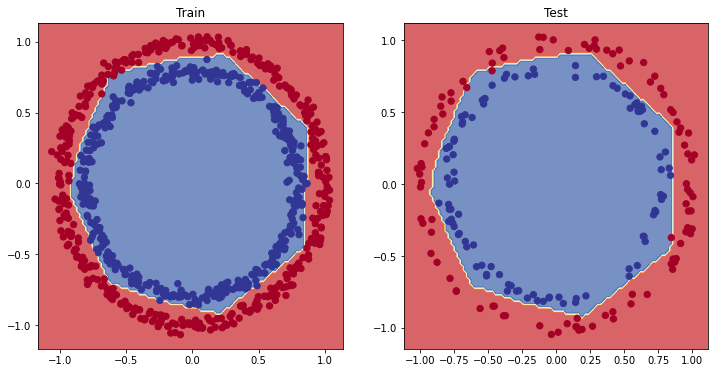

In [ ]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title('Train')

plot_decision_boundary(model_8,X=X_train,y = y_train)
plt.subplot(1,2,2)
plt.title("Test")

plot_decision_boundary(model_8,X=X_test,y=y_test)
plt.show()

### Plot the loss curves

Looking at the plots above, we can see the outputs of our model are very good.

But how did our model go whilst it was learning?

As in, how did the performance change everytime the model had a chance to look at the data (once every epoch)?

To figure this out, we can check the **loss curves** (also referred to as the **learning curves**).

You might've seen we've been using the variable `history` when calling the `fit()` function on a model ([`fit()` returns a `History` object](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit)).

This is where we'll get the information for how our model is performing as it learns.

Let's see how we might use it.

In [ ]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.695461,0.49750
1,0.686468,0.52750
2,0.680676,0.55750
3,0.673507,0.56500
4,0.662868,0.58375
5,0.649351,0.62125
6,0.620569,0.73250
7,0.584930,0.72750
8,0.550999,0.76750
9,0.511534,0.80125


Text(0.5, 1.0, 'Model_8 Training Curves')

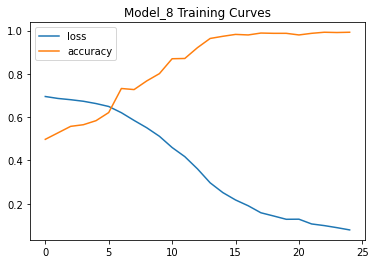

In [ ]:
pd.DataFrame(history.history).plot()
plt.title('Model_8 Training Curves')

### Finding the best learning rate

Aside from the architecture itself (the layers, number of neurons, activations, etc), the most important hyperparameter you can tune for your neural network models is the **learning rate**.

In `model_8` you saw we lowered the Adam optimizer's learning rate from the default of `0.001` (default) to `0.01`.

And you might be wondering why we did this.

Put it this way, it was a lucky guess.

I just decided to try a lower learning rate and see how the model went.

Now you might be thinking, "Seriously? You can do that?"

And the answer is yes. You can change any of the hyperparamaters of your neural networks.

With practice, you'll start to see what kind of hyperparameters work and what don't.

That's an important thing to understand about machine learning and deep learning in general. It's very experimental. You build a model and evaluate it, build a model and evaluate it.

That being said, I want to introduce you a trick which will help you find the optimal learning rate (at least to begin training with) for your models going forward.

To do so, we're going to use the following:
* A [learning rate **callback**](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/LearningRateScheduler).
   * You can think of a callback as an extra piece of functionality you can add to your model *while* its training.
* Another model (we could use the same ones as above, we we're practicing building models here).
* A modified loss curves plot.

We'll go through each with code, then explain what's going on.

> 🔑 **Note:** The default hyperparameters of many neural network building blocks in TensorFlow are setup in a way which usually work right out of the box (e.g. the [Adam optimizer's](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) default settings can usually get good results on many datasets). So it's a good idea to try the defaults first, then adjust as needed.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as model_8)
model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_9.compile(loss="binary_crossentropy", # we can use strings here too
              optimizer="Adam", # same as tf.keras.optimizers.Adam() with default settings
              metrics=["accuracy"]) 


lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 *10**(epoch/20 ))


history = model_9.fit(X_train, y_train, epochs=100,callbacks=[lr_scheduler])


Epoch 1/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.4988 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4975 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.4963 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6922 - accuracy: 0.4975 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6914 - accuracy: 0.5063 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6906 - accuracy: 0.5013 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6898 - accuracy: 0.4950 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6889 - accuracy: 0.5038 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

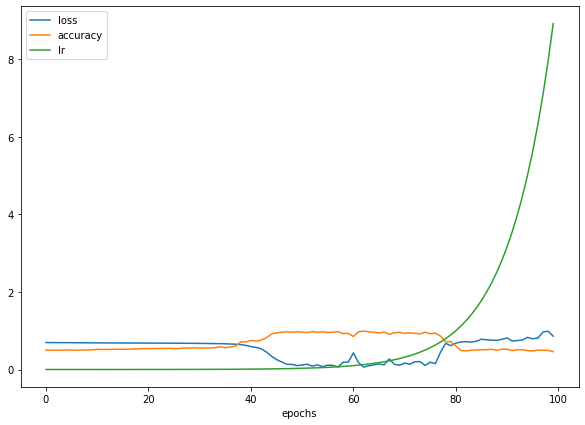

In [ ]:
pd.DataFrame(history.history).plot(figsize=(10,7),xlabel='epochs')

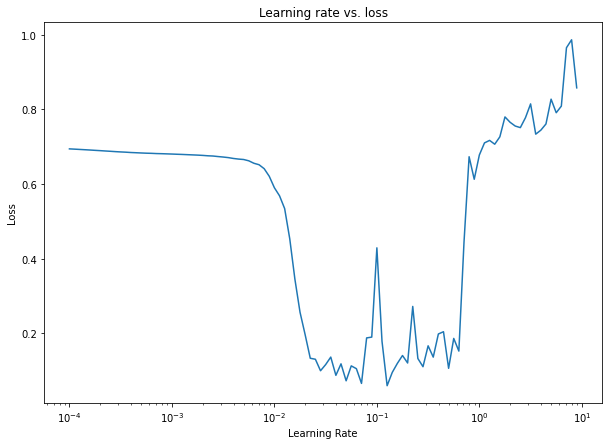

In [ ]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

To figure out the ideal value of the learning rate (at least the ideal value to *begin* training our model), the rule of thumb is to take the learning rate value where the loss is still decreasing but not quite flattened out (usually about 10x smaller than the bottom of the curve).

In this case, our ideal learning rate ends up between `0.01` ($10^{-2}$) and `0.02`.

![finding the ideal learning rate by plotting learning rate vs. loss](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/02-learning-rate-vs-loss.png)

*The ideal learning rate at the start of model training is somewhere just before the loss curve bottoms out (a value where the loss is still decreasing).*

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as model_8)
model_10 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_10.compile(loss="binary_crossentropy", # we can use strings here too
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.02), # same as tf.keras.optimizers.Adam() with default settings
              metrics=["accuracy"]) 




history = model_10.fit(X_train, y_train, epochs=100)


Epoch 1/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6837 - accuracy: 0.5600
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6744 - accuracy: 0.5750
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6626 - accuracy: 0.5875
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6332 - accuracy: 0.6388
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5830 - accuracy: 0.7563
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4907 - accuracy: 0.8313
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.4251 - accuracy: 0.8450
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3596 - accuracy: 0.8875
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3152 - accuracy: 0.9100
Epoch 10/100
25/25 [==============================] - 0s 3ms/step - loss: 0.2512 - accuracy: 0.9500
Epoch 11/

### More classification evaluation methods

Alongside the visualizations we've been making, there are a number of different evaluation metrics we can use to evaluate our classification models.

| **Metric name/Evaluation method** | **Defintion** | **Code** |
| --- | --- | --- |
| Accuracy | Out of 100 predictions, how many does your model get correct? E.g. 95% accuracy means it gets 95/100 predictions correct. | [`sklearn.metrics.accuracy_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) or [`tf.keras.metrics.Accuracy()`](tensorflow.org/api_docs/python/tf/keras/metrics/Accuracy) |
| Precision | Proportion of true positives over total number of samples. Higher precision leads to less false positives (model predicts 1 when it should've been 0). | [`sklearn.metrics.precision_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html) or [`tf.keras.metrics.Precision()`](tensorflow.org/api_docs/python/tf/keras/metrics/Precision) |
| Recall | Proportion of true positives over total number of true positives and false negatives (model predicts 0 when it should've been 1). Higher recall leads to less false negatives. | [`sklearn.metrics.recall_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html) or [`tf.keras.metrics.Recall()`](tensorflow.org/api_docs/python/tf/keras/metrics/Recall) |
| F1-score | Combines precision and recall into one metric. 1 is best, 0 is worst. | [`sklearn.metrics.f1_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html) |
| [Confusion matrix](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/)  | Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagnol line). | Custom function or [`sklearn.metrics.plot_confusion_matrix()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html) |
| Classification report | Collection of some of the main classification metrics such as precision, recall and f1-score. | [`sklearn.metrics.classification_report()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) |

> 🔑 **Note:** Every classification problem will require different kinds of evaluation methods. But you should be familiar with at least the ones above.

Let's start with accuracy.

Because we passed `["accuracy"]` to the `metrics` parameter when we compiled our model, calling `evaluate()` on it will return the loss as well as accuracy.

In [ ]:
loss,accuracy = model_10.evaluate(X_test,y_test)
print(f'Model loss on test set:{loss}')
print(f'Model accuracy on test set:{(accuracy*100):.2f}%')

7/7 [==============================] - 0s 3ms/step - loss: 0.0186 - accuracy: 0.9950
Model loss on test set:0.018565408885478973
Model accuracy on test set:99.50%


In [ ]:
# Create confusion Matrix 

from sklearn.metrics import confusion_matrix

#make Prediction 
y_preds = model_10.predict(X_test)

#create a confustion Matrix 
confusion_matrix(y_test,tf.round(y_preds))

array([[100,   1],
       [  0,  99]])

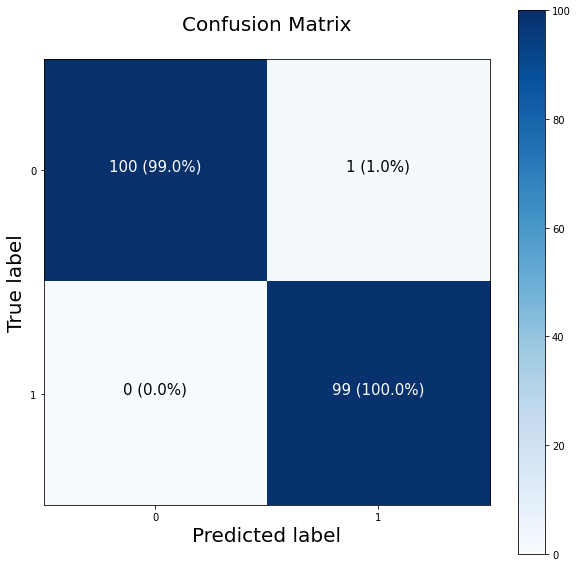

In [ ]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb 
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

# Working with a larger example

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


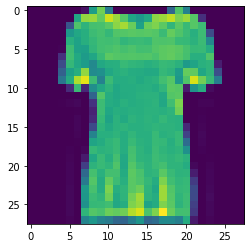

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(train_data[10])

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# How many classes are there (this'll be our output shape)?
len(class_names)

10

Text(0.5, 1.0, 'T-shirt/top')

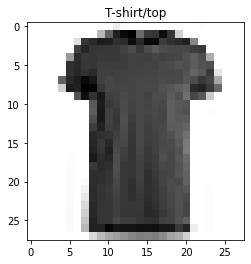

In [ ]:
plt.imshow(train_data[17],cmap=plt.cm.binary)
plt.title(class_names[train_labels[17]])

In [ ]:
# Model 11 

tf.random.set_seed(42)


# Create the model 

model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax)
])


#Compile the model
model_11.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics =['accuracy']
                 )






In [ ]:
train_data.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [ ]:
#Fit the model 

non_norm_history = model_11.fit(
    train_data,
    train_labels,
    epochs=10
)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.1799 - accuracy: 0.1597
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7090 - accuracy: 0.2494
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6367 - accuracy: 0.2860
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6103 - accuracy: 0.2925
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5932 - accuracy: 0.3058
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5887 - accuracy: 0.3109
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5750 - accuracy: 0.3196
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5742 - accuracy: 0.3204
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5730 - accuracy: 0.3239
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.577

In [ ]:
model_11.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_27 (Dense)            (None, 4)                 3140      
                                                                 
 dense_28 (Dense)            (None, 4)                 20        
                                                                 
 dense_29 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


## Normalize the data


In [ ]:
train_data.min(), train_data.max()

(0.0, 1.0)

In [ ]:
train_data = train_data / 255.0

test_data = test_data / 255.0 

# check the min and max values of the training data 

train_data.min() , train_data.max()

(0.0, 0.00392156862745098)

In [ ]:
# Model 11 

tf.random.set_seed(42)


# Create the model 

model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax)
])


#Compile the model
model_12.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics =['accuracy']
                 )

norm_history = model_12.fit(train_data,train_labels, epochs=10, validation_data = (test_data,test_labels))




Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.8902 - accuracy: 0.2401 - val_loss: 1.5796 - val_accuracy: 0.3234
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.4834 - accuracy: 0.3576 - val_loss: 1.4235 - val_accuracy: 0.4097
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.3583 - accuracy: 0.4153 - val_loss: 1.3197 - val_accuracy: 0.4177
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.2828 - accuracy: 0.4371 - val_loss: 1.2702 - val_accuracy: 0.4429
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.2445 - accuracy: 0.4479 - val_loss: 1.2401 - val_accuracy: 0.4572
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.2211 - accuracy: 0.4612 - val_loss: 1.2224 - val_accuracy: 0.4700
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 1.2046 - accuracy: 0.4690 - val_loss: 1.2068 - val_accuracy:

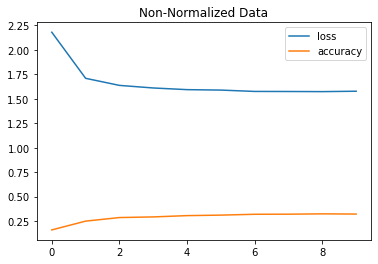

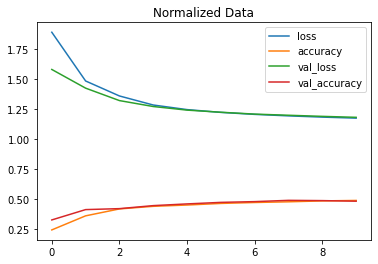

In [ ]:
import pandas as pandas

# plotting non-normalized data

pd.DataFrame(non_norm_history.history).plot(title ='Non-Normalized Data')

#plot normalized data
pd.DataFrame(norm_history.history).plot(title ='Normalized Data')


In [ ]:
# Model 11 

tf.random.set_seed(42)


# Create the model 

model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax)
])


#Compile the model
model_13.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics =['accuracy']
                 )


lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3* 10**(epoch/20))

norm_history = model_13.fit(train_data,train_labels, epochs=40, validation_data = (test_data,test_labels) ,callbacks=[lr_scheduler])





Epoch 1/40
1875/1875 [==============================] - 8s 4ms/step - loss: 1.8902 - accuracy: 0.2401 - val_loss: 1.5796 - val_accuracy: 0.3234 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 9s 5ms/step - loss: 1.4749 - accuracy: 0.3622 - val_loss: 1.4091 - val_accuracy: 0.4086 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 8s 4ms/step - loss: 1.3348 - accuracy: 0.4223 - val_loss: 1.2949 - val_accuracy: 0.4246 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 9s 5ms/step - loss: 1.2577 - accuracy: 0.4466 - val_loss: 1.2458 - val_accuracy: 0.4459 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 8s 4ms/step - loss: 1.2197 - accuracy: 0.4595 - val_loss: 1.2154 - val_accuracy: 0.4673 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 8s 4ms/step - loss: 1.1952 - accuracy: 0.4744 - val_loss: 1.1986 - val_accuracy: 0.4871 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 8s

In [ ]:
10**-3

0.001

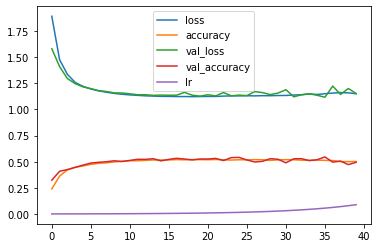

In [ ]:
pd.DataFrame(norm_history.history).plot()

In [ ]:
# Model 11 

tf.random.set_seed(42)


# Create the model 

model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax)
])


#Compile the model
model_14.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics =['accuracy']
                 )


lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3* 10**(epoch/20))
norm_history = model_14.fit(train_data,train_labels, epochs=40, validation_data = (test_data,test_labels) ,callbacks=[lr_scheduler])





Epoch 1/40
1875/1875 [==============================] - 5s 3ms/step - loss: 1.8902 - accuracy: 0.2401 - val_loss: 1.5796 - val_accuracy: 0.3234 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 8s 4ms/step - loss: 1.4749 - accuracy: 0.3622 - val_loss: 1.4091 - val_accuracy: 0.4086 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 5s 3ms/step - loss: 1.3348 - accuracy: 0.4223 - val_loss: 1.2949 - val_accuracy: 0.4246 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 5s 3ms/step - loss: 1.2577 - accuracy: 0.4466 - val_loss: 1.2458 - val_accuracy: 0.4459 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 5s 3ms/step - loss: 1.2197 - accuracy: 0.4595 - val_loss: 1.2154 - val_accuracy: 0.4673 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 5s 3ms/step - loss: 1.1952 - accuracy: 0.4744 - val_loss: 1.1986 - val_accuracy: 0.4871 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 5s

Now we've got a model trained with a close-to-ideal learning rate and performing pretty well, we've got a couple of options.

We could:
* Evaluate its performance using other classification metrics (such as a [confusion matrix](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py) or [classification report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)).
* Assess some of its predictions (through visualizations).
* Improve its accuracy (by training it for longer or changing the architecture).
* Save and export it for use in an application.

Let's go through the first two options.

First we'll create a classification matrix to visualize its predictions across the different classes.

In [ ]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix


# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [ ]:
# Make predictions with the most recent model
y_probs = model_14.predict(test_data) # "probs" is short for probabilities

# View the first 5 predictions
y_probs[:5]

array([[5.9027087e-07, 5.7654810e-04, 2.4664164e-12, 2.3388562e-08,
        4.5239035e-09, 3.2446536e-01, 1.7082927e-09, 4.8125678e-01,
        2.7409419e-03, 1.9095975e-01],
       [3.7452139e-02, 2.9779563e-05, 2.9907400e-02, 9.5372386e-03,
        1.2000276e-01, 1.0266960e-01, 9.5119737e-02, 6.2974361e-03,
        5.9896141e-01, 2.2509856e-05],
       [6.4310414e-04, 9.7441614e-01, 7.3346695e-07, 2.4938319e-02,
        5.5043370e-07, 2.4142633e-14, 1.2410285e-06, 2.1265918e-15,
        3.2642857e-11, 7.6756933e-13],
       [6.4310414e-04, 9.7441614e-01, 7.3346695e-07, 2.4938319e-02,
        5.5043370e-07, 2.4142633e-14, 1.2410285e-06, 2.1265918e-15,
        3.2642857e-11, 7.6756933e-13],
       [2.6951810e-02, 1.2178447e-06, 2.6366067e-01, 1.0257713e-02,
        2.9495072e-01, 5.4196916e-03, 2.7359411e-01, 1.7172660e-04,
        1.2499217e-01, 2.3911292e-07]], dtype=float32)

In [ ]:
# Convert all of the predictions from probabilities to labels
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([7, 8, 1, 1, 4, 1, 4, 4, 8, 5])

In [ ]:
test_labels.shape,y_preds

((10000,), array([7, 8, 1, ..., 4, 1, 5]))

In [ ]:
# checkout the confusion matrix 

from sklearn.metrics import confusion_matrix

confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[  0,   1,   0, 641,  70,   1, 264,   1,  22,   0],
       [  0, 848,   0, 131,   9,   0,  11,   0,   1,   0],
       [  0,   0,   0,  41, 533,   1, 366,   0,  59,   0],
       [  0,   6,   0, 723,  55,   0, 203,   0,  13,   0],
       [  0,   0,   0,  71, 531,   0, 312,   0,  86,   0],
       [  0,   0,   0,   0,   3, 672,   0,  85, 201,  39],
       [  0,   0,   0, 166, 489,   2, 264,   0,  79,   0],
       [  0,   0,   0,   0,   0, 402,   0, 395,  16, 187],
       [  0,   0,   0,   7,  61, 256,  24,   3, 648,   1],
       [  0,   0,   0,   0,   0,  40,   0,  94,   2, 864]])

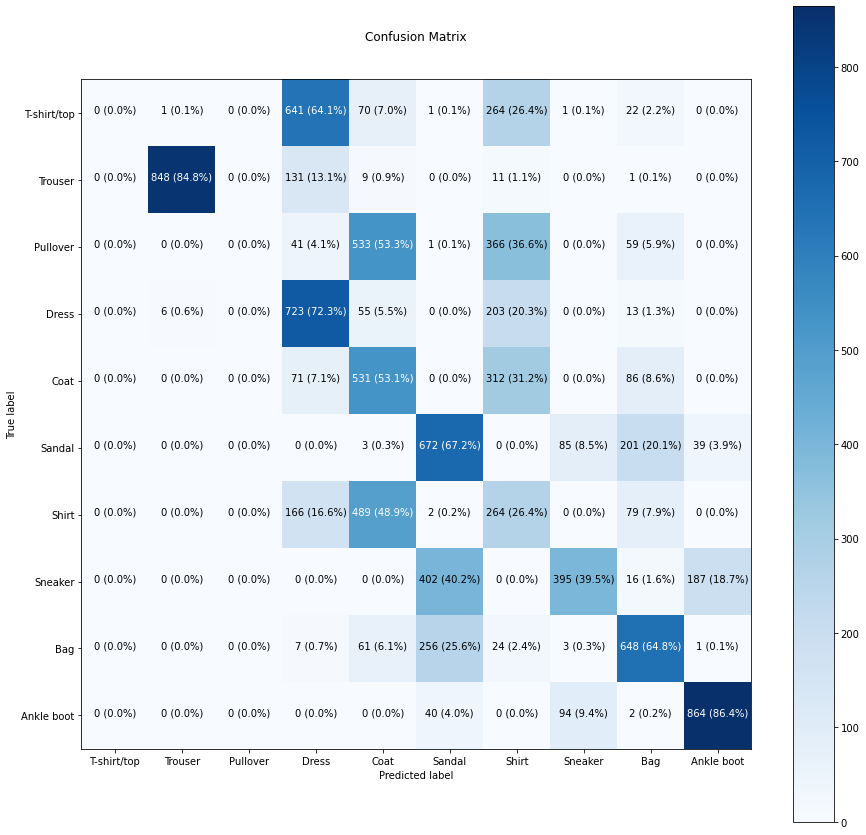

In [ ]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels, 
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

In [ ]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.
  
  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """ 
  # Setup random integer
  i = random.randint(0, len(images))
  
  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

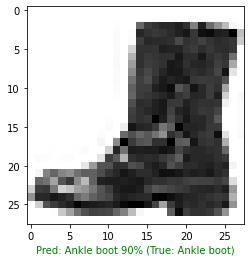

In [ ]:
# Check out a random image as well as its prediction
plot_random_image(model=model_14, 
                  images=test_data, 
                  true_labels=test_labels, 
                  classes=class_names)